<a href="https://colab.research.google.com/github/AbdullahMakhdoom/COVIDNet-CT-Identification/blob/main/diffusers_img2img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
pip install diffusers["torch"] transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.3/961.3 kB 11.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 62.1 MB/s eta 0:00:00
  Created wheel for diffusers: filename=diffusers-0.19.1-py3-none-any.whl size=1318528 sha256=daa2e8c2479cbd753b9826a722893aece934d158a674c61623c5adc476a1d691
  Stored in directory: /root/.cache/pip/wheels/bd/4d/d3/85c4ff768cd8b5077f3f042380aec3b3fcef20d174ac830ecd
Successfully built diffusers


In [24]:
MODEL_ID = "stabilityai/stable-diffusion-2-1"
DEVICE = "cuda"


In [25]:
import os
from diffusers import DiffusionPipeline


model_id = "stabilityai/stable-diffusion-2-1"
MODEL_CACHE = "diffusers-cache"
os.makedirs(MODEL_CACHE, exist_ok=True)


In [26]:
from diffusers import (
    StableDiffusionPipeline,
    StableDiffusionImg2ImgPipeline,
    PNDMScheduler,
    LMSDiscreteScheduler,
    DDIMScheduler,
    EulerDiscreteScheduler,
    EulerAncestralDiscreteScheduler,
    DPMSolverMultistepScheduler,
)

txt2img_pipe = StableDiffusionPipeline.from_pretrained(
    MODEL_ID,
    cache_dir=MODEL_CACHE,
    ).to(DEVICE)

img2img_pipe = StableDiffusionImg2ImgPipeline(
    vae=txt2img_pipe.vae,
    text_encoder=txt2img_pipe.text_encoder,
    tokenizer=txt2img_pipe.tokenizer,
    unet=txt2img_pipe.unet,
    scheduler=txt2img_pipe.scheduler,
    safety_checker=txt2img_pipe.safety_checker,
    feature_extractor=txt2img_pipe.feature_extractor,
    ).to(DEVICE)


Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_img2img.StableDiffusionImg2ImgPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [27]:
input_image = "/content/Skyscrapers-Singapore.webp"

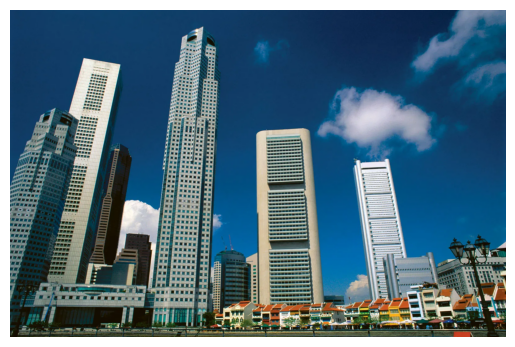

In [33]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


img = mpimg.imread(input_image)
plt.imshow(img)
plt.axis('off')
plt.show()

extra_kwargs = {
    "image": Image.open(input_image).convert("RGB"),
    "strength": 0.7
}



In [34]:
import torch
seed = 42

# seed generator to create initial latent noise
generator = torch.Generator("cuda").manual_seed(seed)

In [35]:
prompt = "Convert the image to Vincent Van Gogh's The Starry Night style"
num_outputs = 1

In [36]:
output = img2img_pipe(
            prompt=[prompt] * num_outputs if prompt is not None else None,
            guidance_scale=7.5, # weight given to prompt when generating image
            generator=generator,
            num_inference_steps=25, # Number of denoising steps
            **extra_kwargs,
        )

  0%|          | 0/17 [00:00<?, ?it/s]

The guidance_scale parameter determines how much weight should be given to the prompt when generating an image.


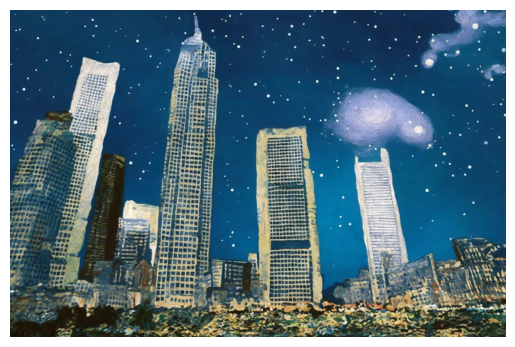

In [37]:


output_paths = []
for i, sample in enumerate(output.images):
    output_path = f"/tmp/out-{i}.png"
    sample.save(output_path)
    img = mpimg.imread(output_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()